In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer


In [43]:
data = pd.read_csv('concrete_data.csv')

In [44]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [45]:
# check for missing values
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [46]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [47]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('Strength',axis=1),data['Strength'],test_size=0.2,random_state=0)

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6369606518338298

In [49]:
lr=LinearRegression()
np.mean(cross_val_score(lr,data.drop('Strength',axis=1),data['Strength'],scoring='r2'))

np.float64(0.46099404916628633)

In [50]:
X_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
741,480.0,0.0,0.0,192.0,0.0,936.0,721.0,28
638,375.0,0.0,0.0,186.0,0.0,1038.0,758.0,28
993,303.6,139.9,0.0,213.5,6.2,895.5,722.5,28
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90
...,...,...,...,...,...,...,...,...
277,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56
763,385.0,0.0,0.0,186.0,0.0,966.0,763.0,1
835,144.0,0.0,175.0,158.0,18.0,943.0,844.0,28
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28


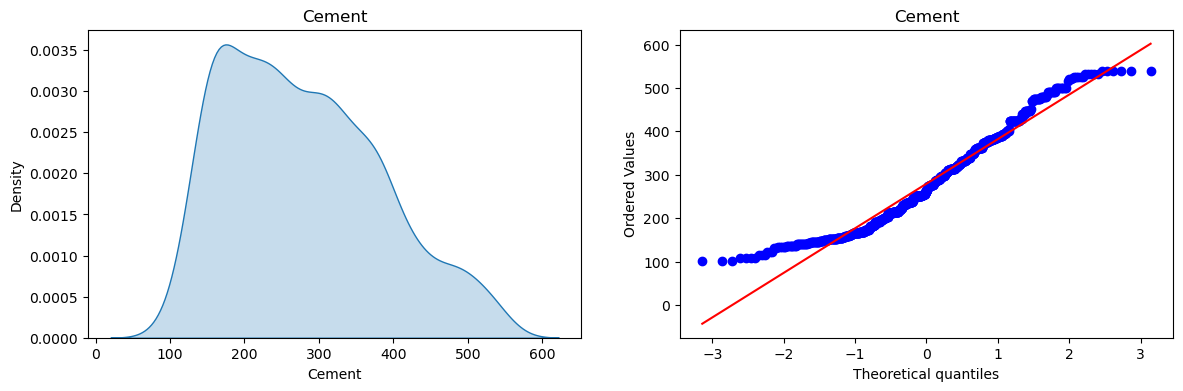

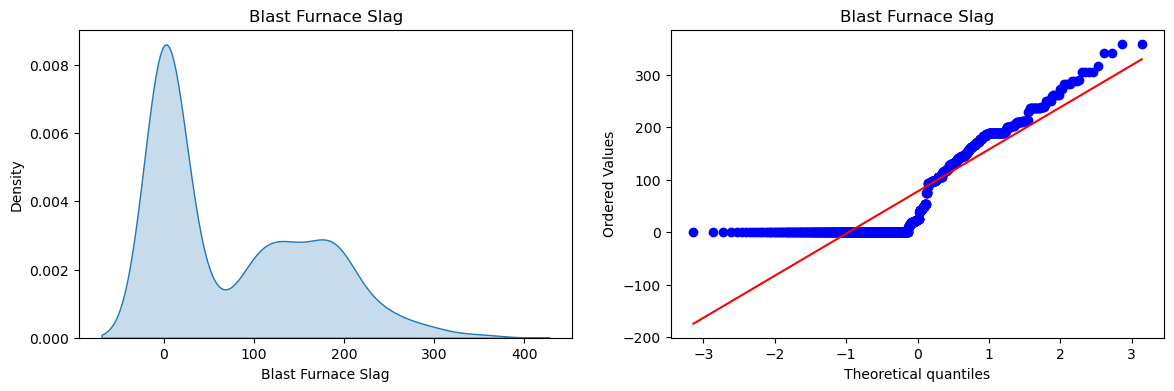

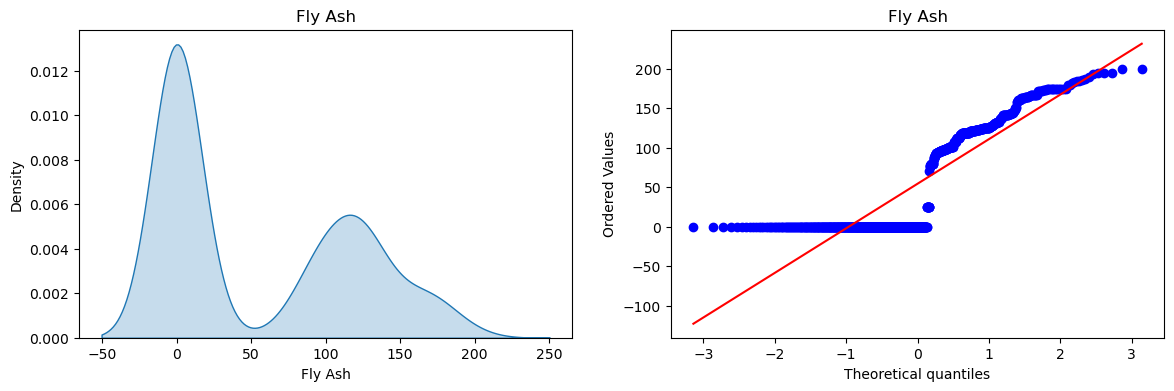

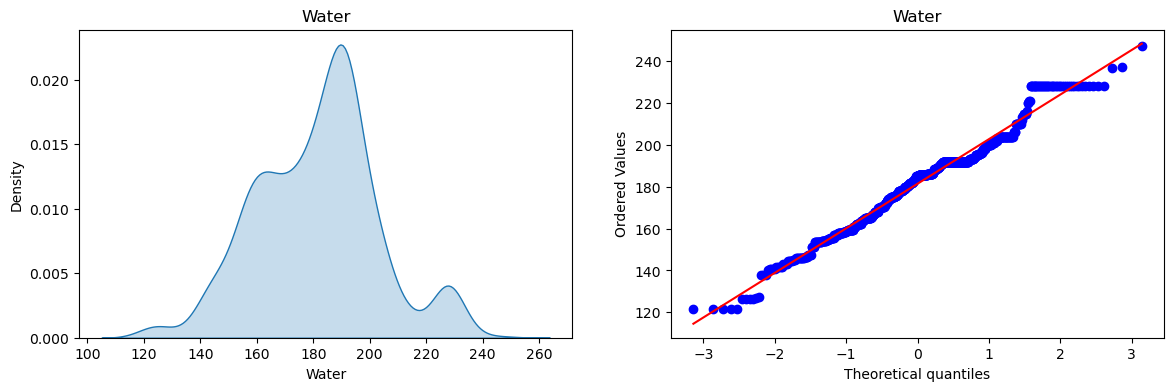

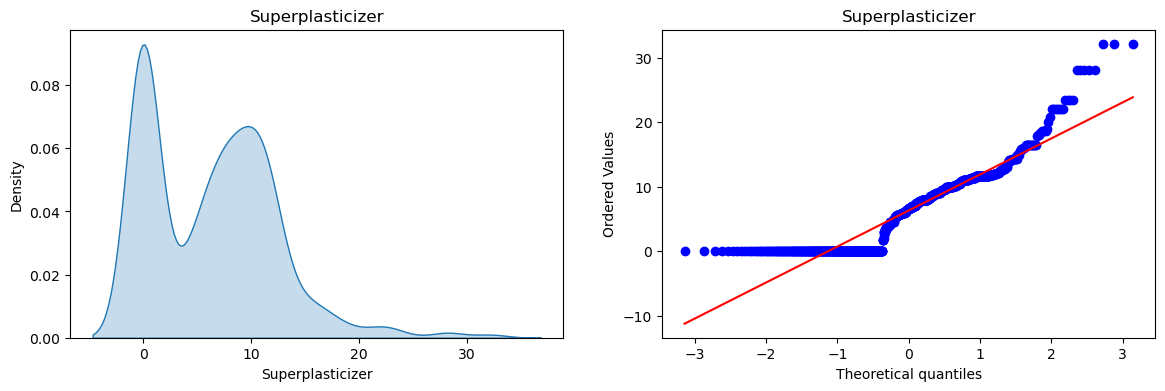

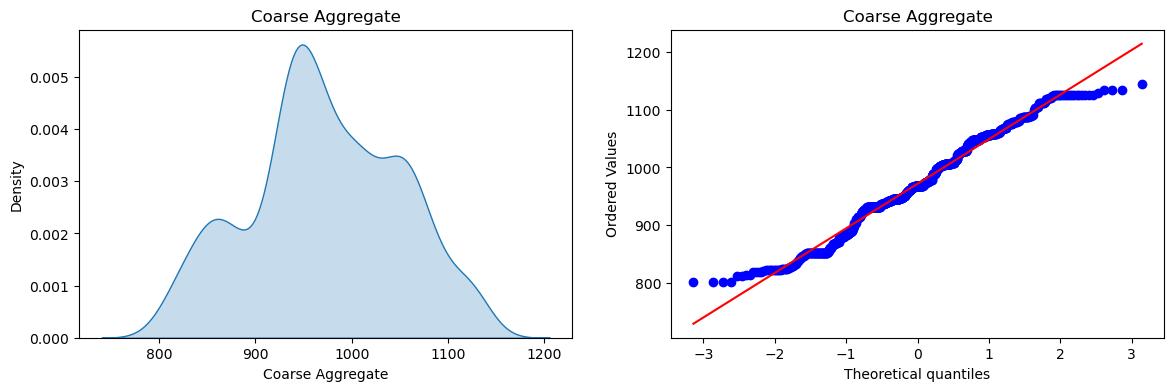

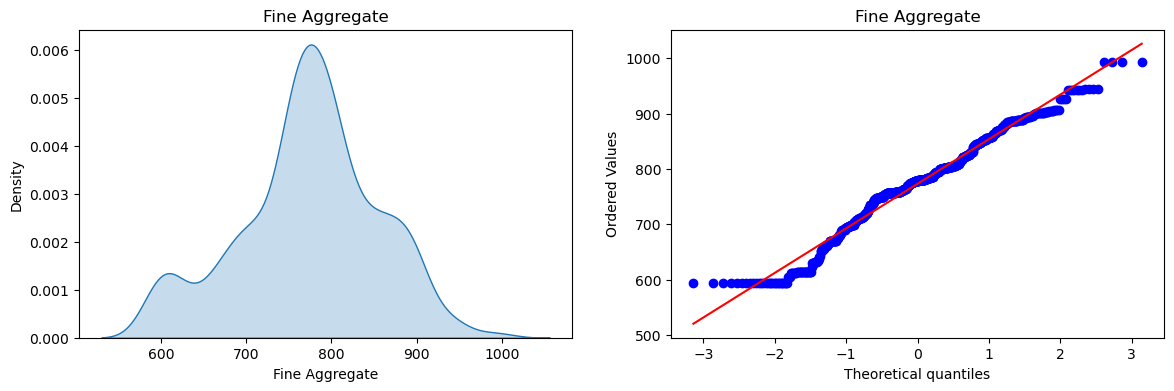

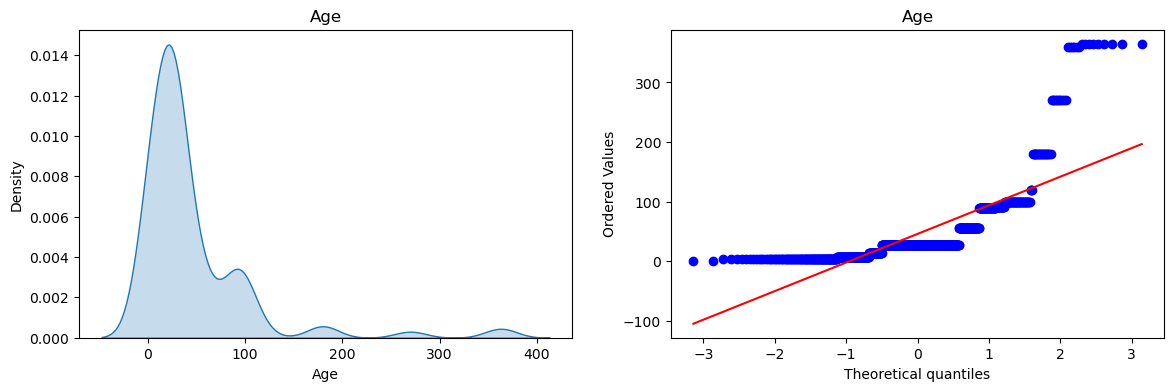

In [52]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col],fill=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

In [53]:
# Apply Box-Cox transform
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.0000001)
X_test_transformed = pt.transform(X_test+0.0000001)


In [55]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.812926381972717

In [57]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(data.drop('Strength',axis=1)+0.0000001)
lr=LinearRegression()
np.mean(cross_val_score(lr,X_transformed,data['Strength'],scoring='r2'))

np.float64(0.6658537935430976)

So we can see that after applying transformation the result is getting better

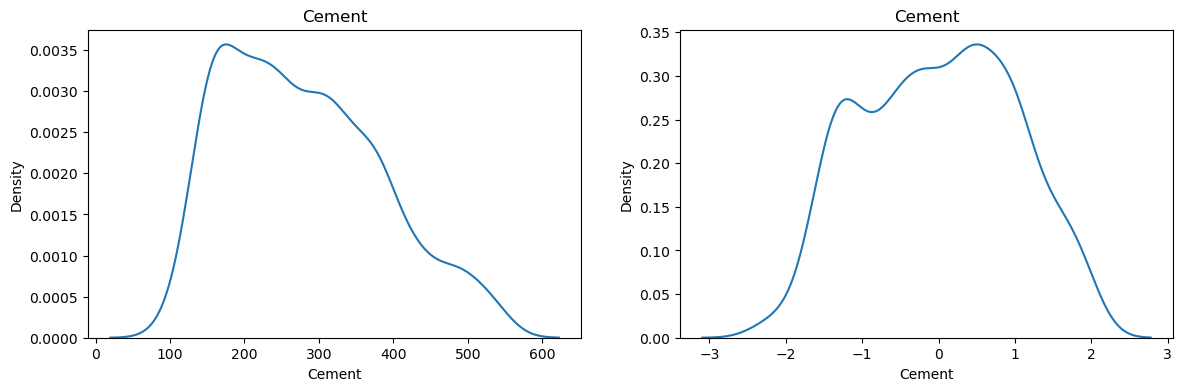

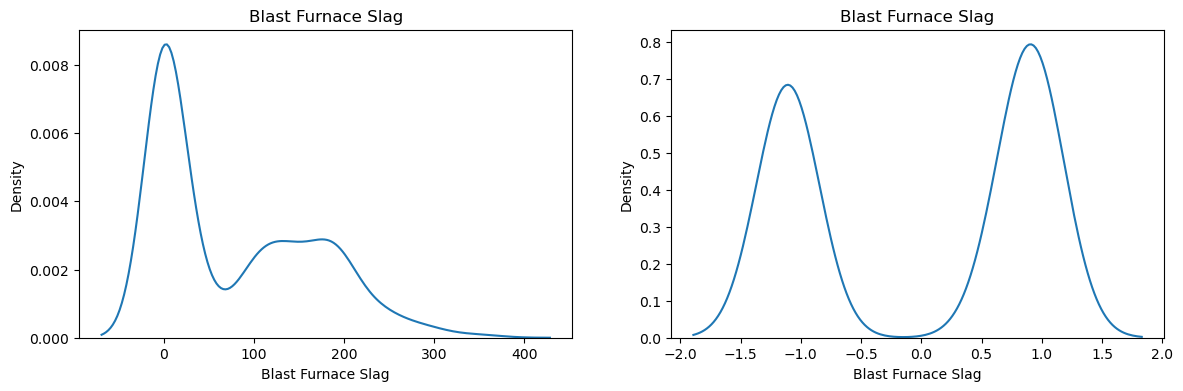

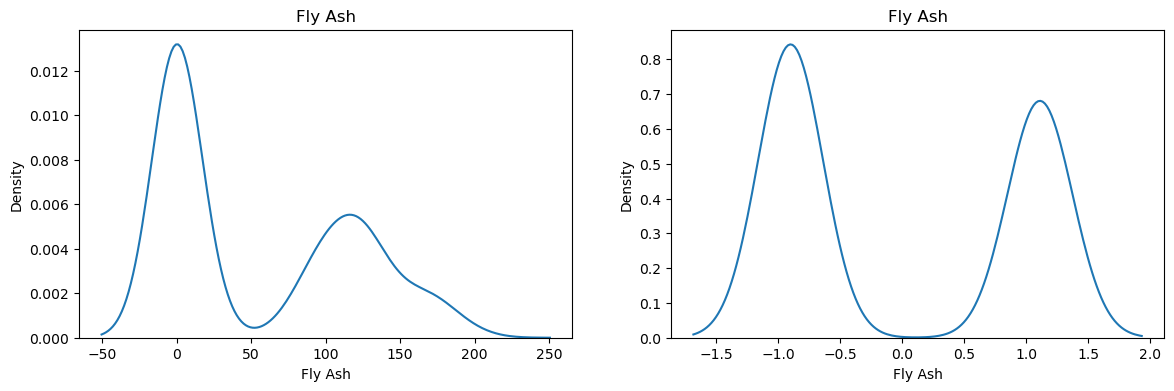

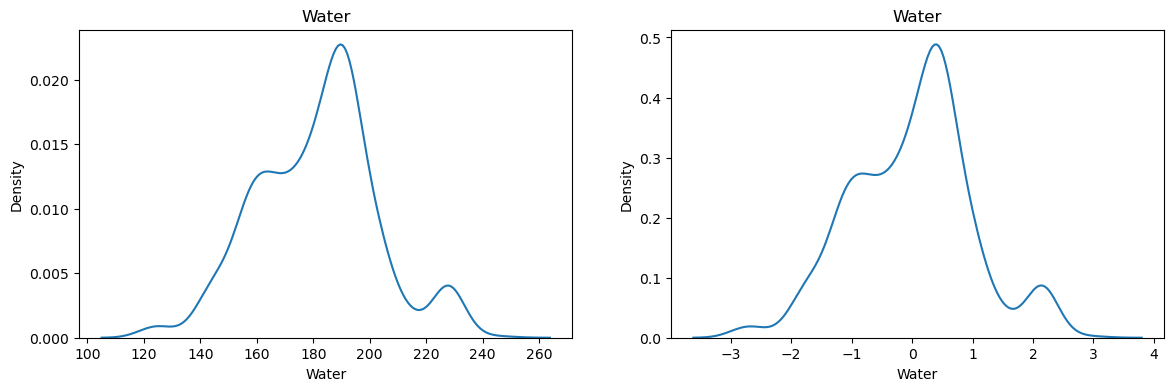

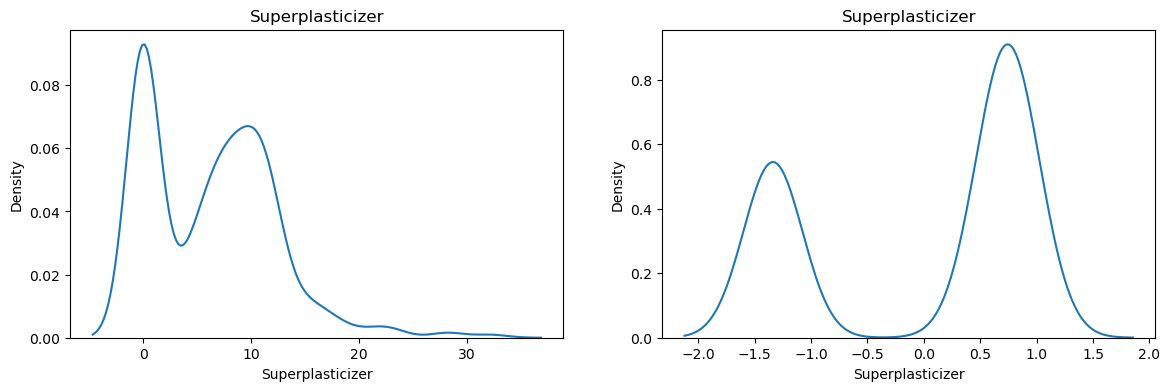

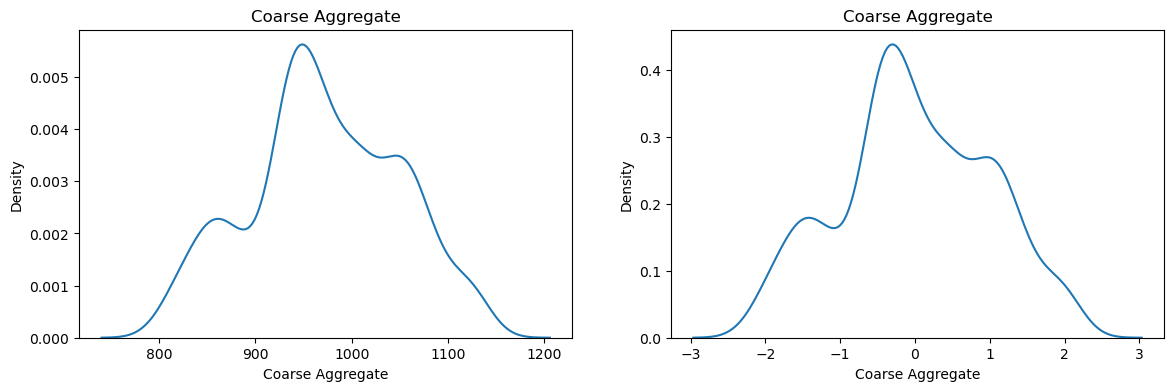

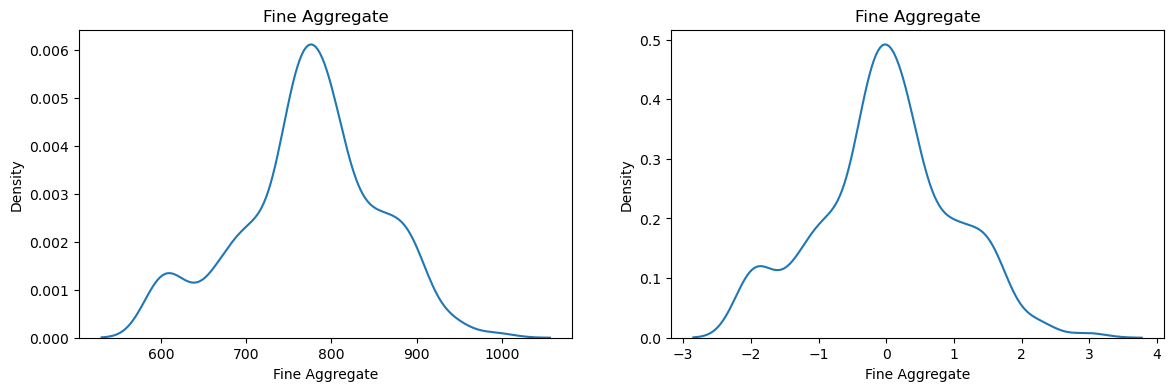

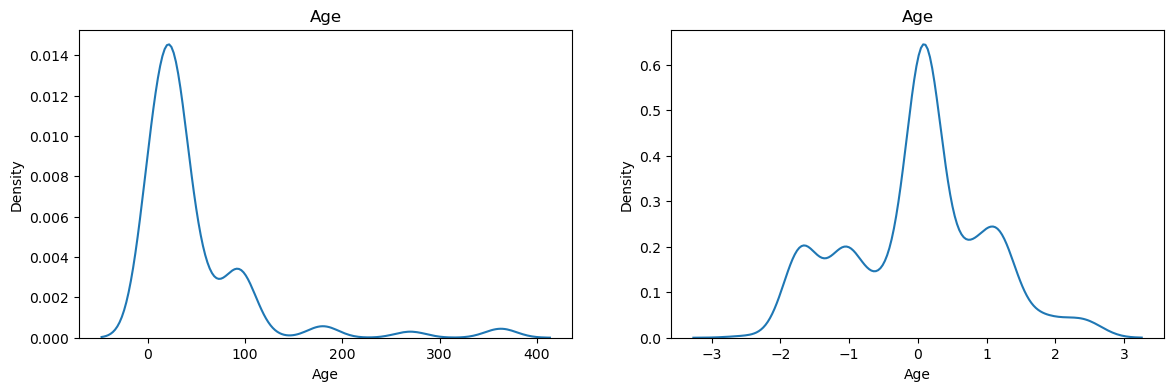

In [58]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)
    plt.subplot(122)
    sns.kdeplot(X_train_transformed[col])
    plt.title(col)

# Applying Yeo-Johnson transform

In [59]:
pt1 = PowerTransformer()
X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_transformed2,y_train)
y_pred3 = lr.predict(X_test_transformed2)

print("r2 score: ",r2_score(y_test,y_pred3))

r2 score:  0.8253744908767401


In [61]:
pt2 = PowerTransformer()
X_transformed2 = pt2.fit_transform(data.drop('Strength',axis=1))
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,data['Strength'],scoring='r2'))

np.float64(0.6834625141500864)

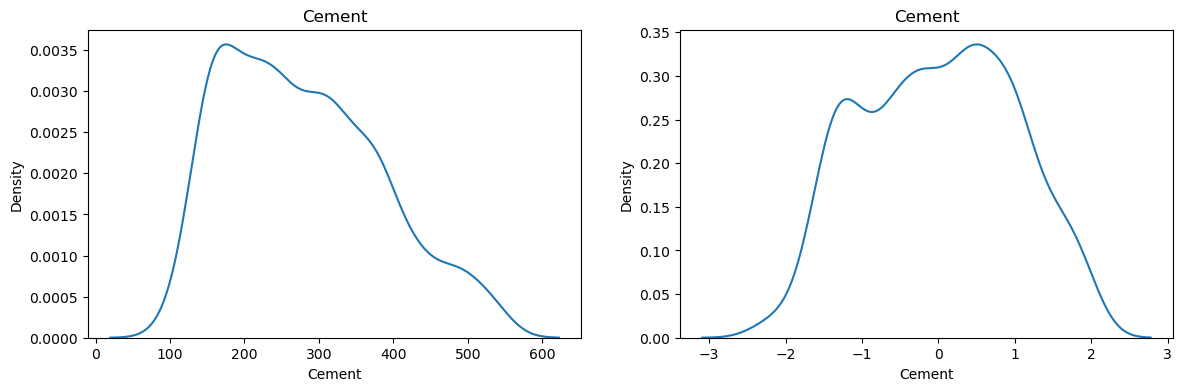

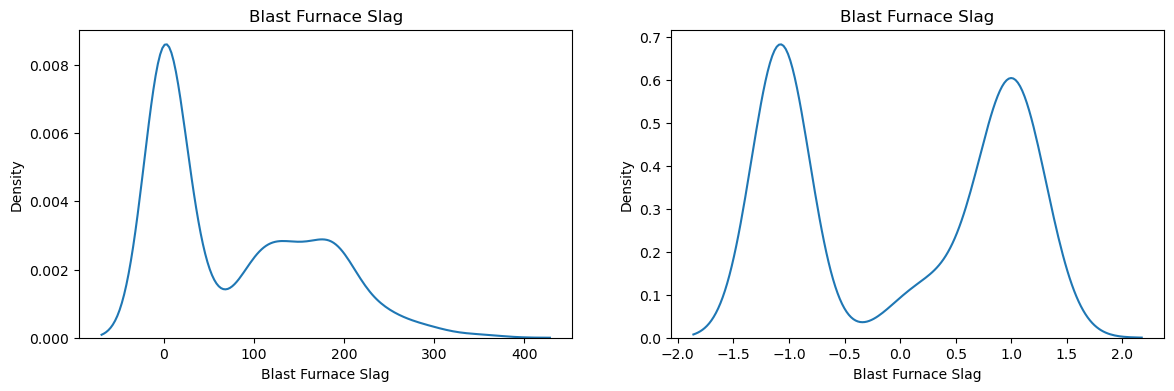

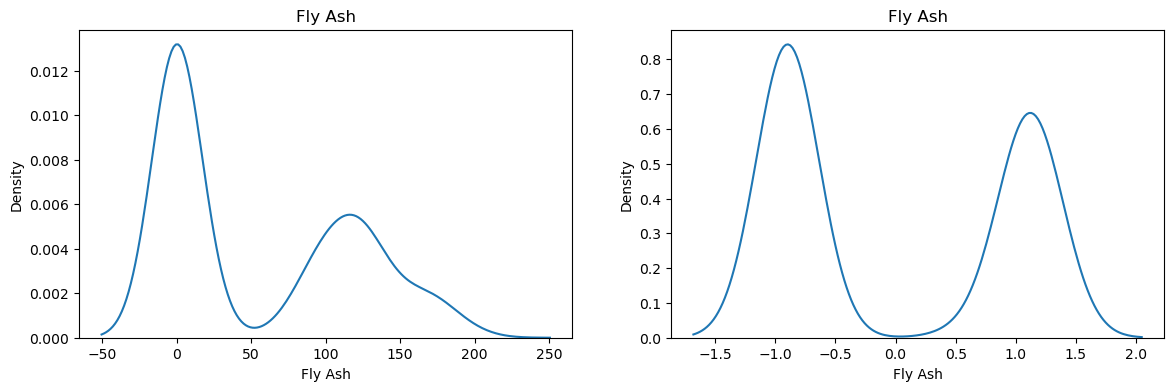

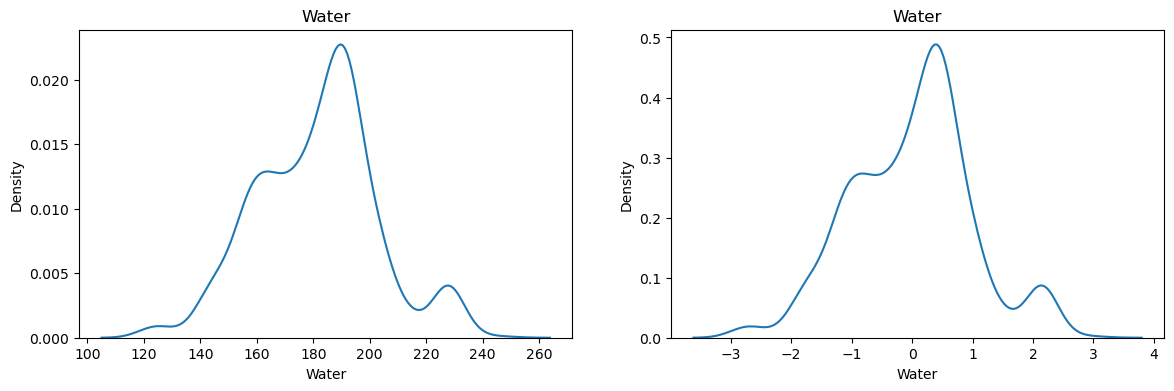

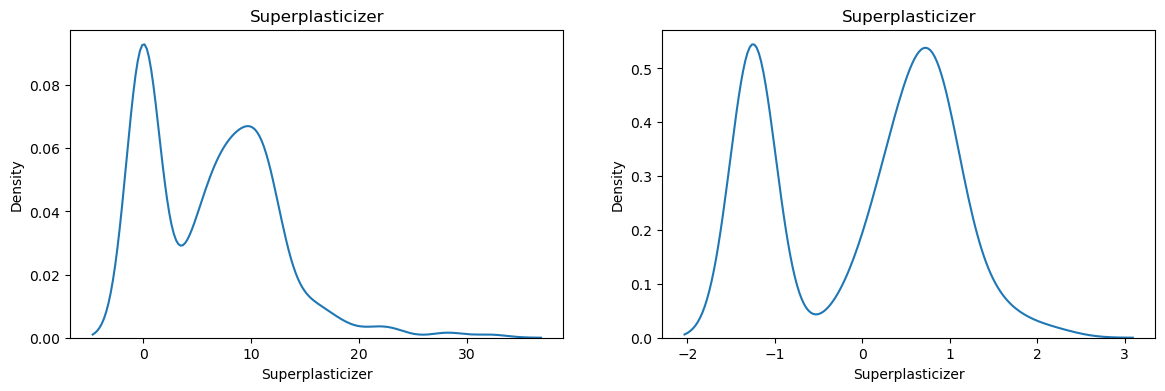

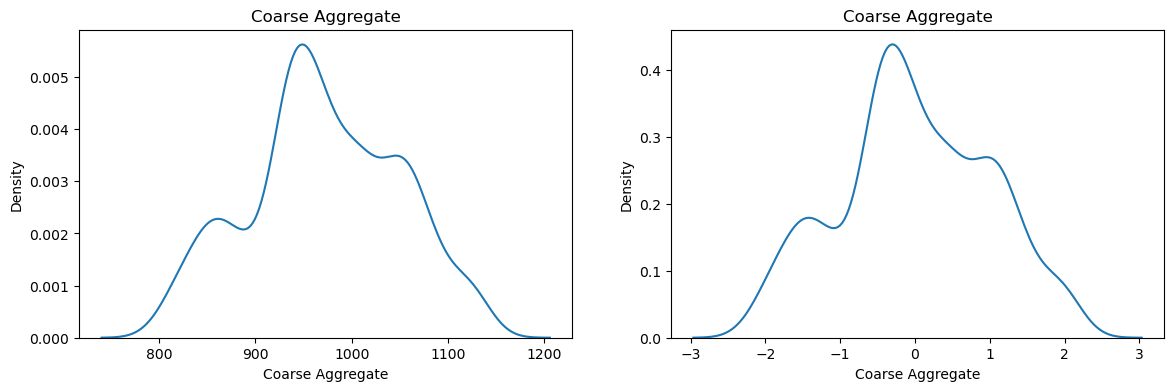

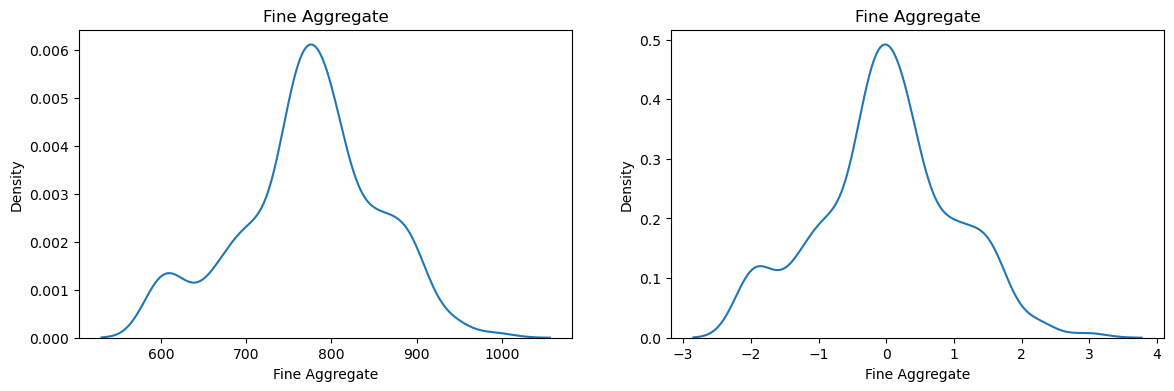

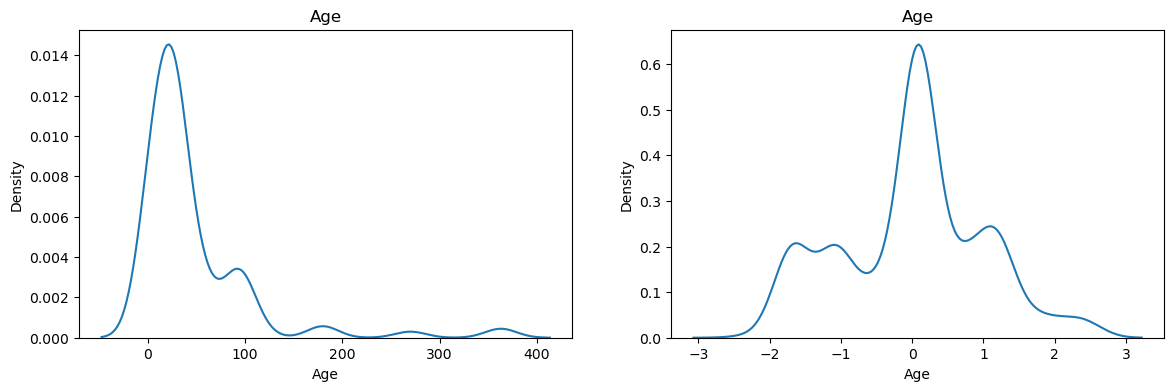

In [63]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(col)
    plt.subplot(122)
    sns.kdeplot(X_train_transformed2[col])
    plt.title(col)
    plt.show()

# Observation
So from above charts we can observe that our data was not normally distributed earlier but after applying power transformers the data is getting normally distributed and also we can see the difference in accuracy of prediction after applying transformers the accuracy gradually increases.